<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Gerardo Ruiz Velasco y Eduardo

**Fecha:** 8 de marzo del 2021.

**Expediente** : 715878 | . 
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link GitHub:**

### Tarea 6: Clase 10

# Tarea 6
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [9]:
# Paqueterias 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

[1.875] [1.875]


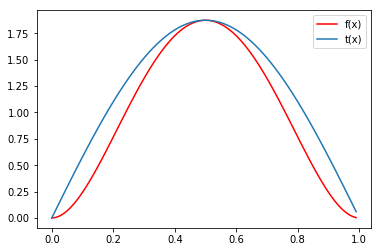

In [10]:
#Solución Gerardo 
f = lambda x:30*(x**2-2*x**3+x**4) #Función
f_max = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #f negativa para max
t = lambda x: f_max*np.sin(x*np.pi) #función que mayora a f(x) a t(x)=a
t_max = f(optimize.fmin(lambda x:-t(x),0,disp=False))#t negativa para max

x = np.arange(0,1,0.01) 
print(max_f,max_t)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)',color="red")
plt.plot(x,t(x),label='t(x)')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

### Solución Gerardo

Sabemos que:

$$g(x)=\frac{f(x)}{c}$$

y que $t(x)$ está definida entre a y b:

$$a=0$$

$$b=1$$

Definimos:

$$c = \int_{-\infty}^{\infty} t(x) dx$$.

Le damos los límites a nuestra integral:

$$ c=\int_{a}^{b} t(x)  dx$$

Sustituimos límites:

$$ c=\int_{0}^{1} t(x)  dx$$

Sustituimos $t(x)$:

$$c= \int_{0}^{1} a \sin(\pi x) dx$$

Definimos nuestra $c$:

$$c= \frac{2a}{\pi} $$

Sustituimos:

$$g(x) =  \frac{a \sin(\pi x)}{\frac{2a}{\pi}}$$

$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$


3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex).

### Solución Gerardo:

Sabemos por el ejercicio 2:

$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$

Por definición:

$$G(x) = \int g(x)dx $$

$$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

Definimos:

$$ U = \frac{1}{2}(- \cos(\pi x)+1) $$

Resolvemos:

$$ 2U = (- \cos(\pi x)+1) $$

$$ 2U - 1 = - \cos(\pi x) $$

$$ \cos^{-1}(-2U+1) = \pi x$$

Obtenemos:

$$x= \frac{\arccos(1 - 2U)}{\pi}$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

In [22]:
#Código Tarea 5:

def eje1(f, f_inv, N):
    u=np.random.uniform(0,1,N)
    frand=f_inv(u)
    x=np.arange(0,1,.01)
    fden=f(x)
    plt.hist(frand,density=True, bins=50)#histograma de la función de proba
    plt.plot(x,fden)#plot de la x despejada
    plt.show()

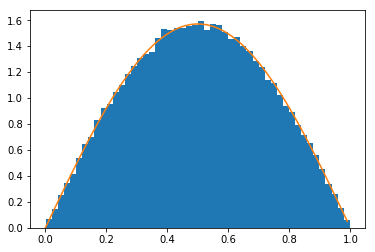

In [23]:
#Solución Gerardo
N=100000
g = lambda x: (np.pi*np.sin(np.pi*x))/2
g_inv = lambda u: (np.arccos(-2*u+1))/np.pi
eje1(g,g_inv,N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

In [25]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    #Comprensión de listas
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    plt.show()

El máximo de f es: [1.875]


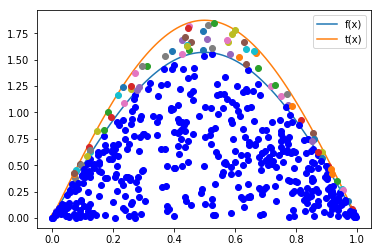

In [26]:
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 #número slicitado
R2 = np.random.rand(N)#Números aleatorios
R1 = np.random.rand(N)#Números aleatorios

quantity_sin = Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [28]:
#Solución Gerardo
#Código clase
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

In [36]:
# Función t -> Función constante
t1= lambda x: max_f*np.sin(x*np.pi) #Senoidal
t2= lambda x: max_f*np.ones(len(x)) #constante
x = np.arange(0,1,0.01)  

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

print('𝑡(𝑥) un pulso senoidal:', sum(Acep_rechazo2(R2,R1,f,t1))/N)
print('𝑡(𝑥) constante:', sum(Acep_rechazo2(R2,R1,f,t2))/N)

𝑡(𝑥) un pulso senoidal: 0.688
𝑡(𝑥) constante: 0.528


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

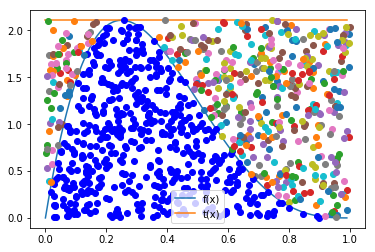

In [40]:
#Solución Gerardo
f = lambda x:20*x*(1-x)**3 #Función
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))#maximo de la función
t = lambda x: max_f*np.ones(len(x)) #Función t


# Validación del método
N = 1000 
R2 = np.random.rand(N)
R1 = np.random.rand(N)
#grafico de las funciones
x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()


Acep_rechazo(R2,R1,f,t)

8. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

### Demostración 

Metemos la función de distribución en la solución:

$$P(k+1, \lambda) = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}$$

Sabemos que $x^{k+1} = x^kx^1$

$$P(k+1, \lambda) = \frac{e^{-\lambda}\lambda^{k}\lambda}{(k+1)!}$$

Sabemos que $x! = x(x-1)!$

$$P(k+1, \lambda) = \frac{e^{-\lambda}\lambda^{k}\lambda}{(k+1)k!}$$

Tenemos la igualdad $P(k) = \frac {e^{-\lambda}\lambda^k}{k!}$

$$P(k+1) = \frac{\lambda P(k)}{( k + 1)}$$

In [43]:
#Solución Gerardo
#Código Tarea 5

def Gen_distr_discreta(X:'vector de números aleatorios',
                       prob_acumulada: 'de la distribución a generar'):
    v = np.array(list(map(lambda j:sum(1 for i in prob_acumulada if i<X[j]),range(N))))
    return v

def plot_histogram_discrete(dist:'señal de varibles aleatorias',
                            label,
                            den=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,6])
    y,x = np.histogram(dist,bins = len(set(dist)),density = den) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    
def P_acum_Binomial(n,p):
    Pr = np.zeros(n) #vector a llenar 
    Pr[0] = (1-p)**n 
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Comprensión de listas 
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

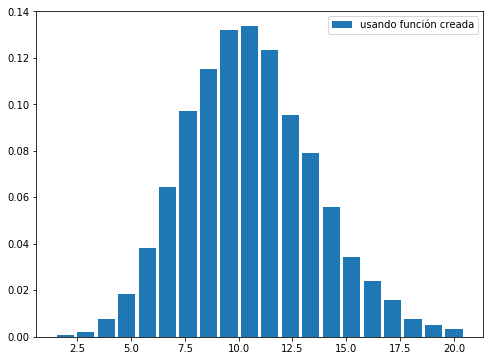

In [44]:
def poisson (n,l):
    Fun= np.zeros(n)
    Fun[0] = np.exp(-l)
    def fun(k):
        nonlocal Fun
        Fun[k+1]=(l/(k+1))*Fun[k]
    [fun(k) for k in range(n-1)]
    return np.cumsum(Fun)

n = 20; l = 10; N = 10**4

p_acum = poisson(n,l)
u = np.random.rand(N)
d_poisson = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_poisson,'usando función creada')